In [62]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
import os
import subprocess


config_path = 'config.json'
output_path = 'coords.xyz'
distribution_path = 'distribution.txt'
energy_path = 'energy.txt'

In [57]:
# subprocess.Popen(['build/main', config_path, output_path, distribution_path, energy_path])

In [56]:
# %matplotlib widget

# fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 6))

# def update_plot(i):
#     x = []
#     with open(distribution_path, 'r') as f:
#         lines = f.readlines()
#         Ts = [np.mean([float(_)**2 / 2 for _ in line.split()])**0.5 for line in lines]

#         for line in lines:
#             for _ in line.split():
#                 x.append(float(_))
    
#     axs[0].cla()
#     axs[0].plot(range(len(Ts)), Ts, color='black')
    
#     hist_, bin_edges = np.histogram(x, bins='auto', density=True)
#     axs[1].cla()
#     axs[1].stairs(np.log(hist_ / bin_edges[1:]**2), bin_edges**2, color='black')

#     with open(energy_path, 'r') as f:
#         energys = np.array([float(_) for _ in f.readlines()])
    
#     axs[2].cla()
#     axs[2].plot(range(len(energys)), energys / energys[0], color='black')


# ani = animation.FuncAnimation(fig, update_plot, interval=100)
# plt.show()

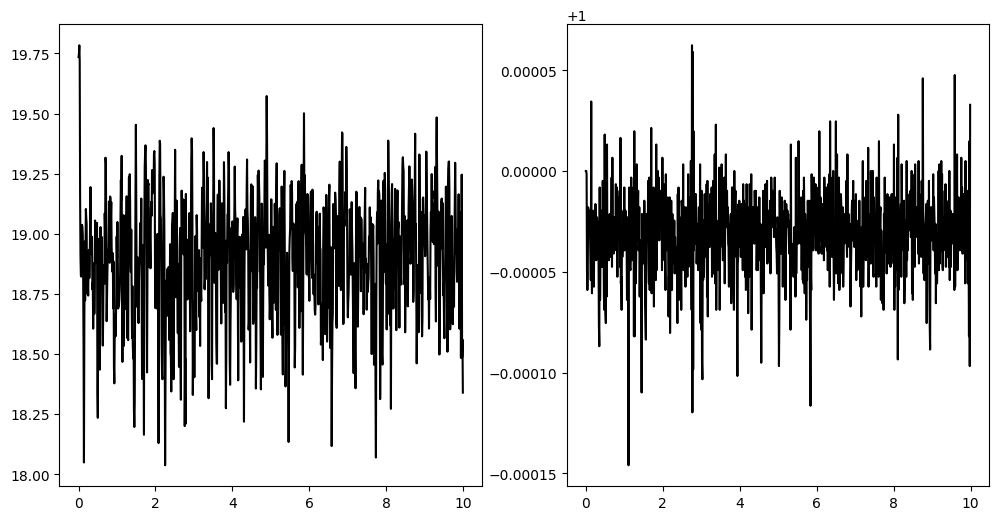

In [63]:
cnt = 10 / 1000

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

config_path = 'config.json'
output_path = 'coords.xyz'
distribution_path = 'distribution.txt'
energy_path = 'chars.txt'

with open(energy_path, 'r') as f:
    energys = []
    temperature = []
    std = []
    for line in f.readlines():
        a, b, c = line.split()
        energys.append(float(a))
        std.append(float(b))
        temperature.append(float(c))

axs[0].plot(np.arange(len(temperature))*cnt, np.array(temperature), color='black')
# axs[1].plot(np.arange(len(std))*cnt, np.array(std)**2 - std[0]**2, color='black')
axs[1].plot(np.arange(len(energys))*cnt, np.array(energys) / energys[0], color='black')

/tmp/ipykernel_16384/3989778224.py:16: RuntimeWarning: divide by zero encountered in log
  y = np.log(hist_) -  2 * np.log(bin_edges[:-1])


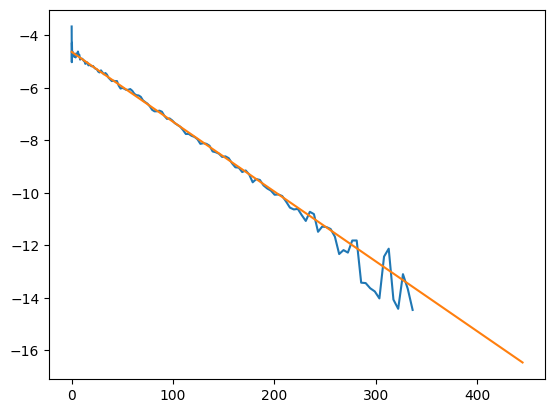

In [64]:
v = []
with open(distribution_path, 'r') as f:
    lines = f.readlines()
    for line in lines:
        for _ in line.split():
            v.append(float(_))

hist_, bin_edges = np.histogram(v, bins='auto', density=True)

T = 18.8
A = 3 / 2 * np.log((1 / (2 * np.pi * T))) + np.log(4 * np.pi)
B = - 1 / (2 * T)

# Примерные данные
X = (bin_edges**2)[:-1]
y = np.log(hist_) -  2 * np.log(bin_edges[:-1])

# Добавляем столбец единиц для свободного члена
X_matrix = np.vstack([X, np.ones(len(X))]).T

# Находим коэффициенты
A_, B_ = np.linalg.lstsq(X_matrix, y, rcond=None)[0]

plt.plot(X, y)
plt.plot(np.linspace(0, max(X), 2), A + B * np.linspace(0, max(X), 2))

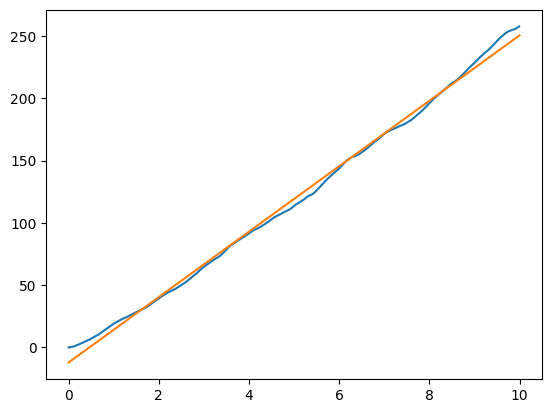

In [65]:
X, y = np.arange(len(std))*cnt, np.array(std)**2 - std[0]**2
X_matrix = np.vstack([X, np.ones(len(X))]).T

# Находим коэффициенты
A_, B_ = np.linalg.lstsq(X_matrix, y, rcond=None)[0]
plt.plot(X, y)
plt.plot(np.linspace(0, len(std)*cnt, 2), B_ + A_ * np.linspace(0, len(std)*cnt, 2))

In [66]:
D = A_ / 6
D

4.376382092834363

In [67]:
# D = 1 / 3 * V * l
lambd = 3 * D / np.mean(v)
lambd

1.8865424132390878